In [1]:
# save the final model to file
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model
def run_test_harness():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model()
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model.h5')

2023-05-18 17:26:46.201086: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-18 17:26:47.090348: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-05-18 17:26:47.090463: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/

In [2]:
# entry point, run the test harness
#run_test_harness()

In [3]:
# evaluate the deep model on the test dataset
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness_load():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # load model
    model = load_model('final_model.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_test_harness_load()

2023-05-18 17:26:48.907510: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-18 17:26:48.918797: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-18 17:26:48.920448: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-18 17:26:48.922592: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild

> 72.990


In [4]:

# See if normalizing the data to have zero mean and standard deviation 1 improves performance

def prep_pixels_2(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # calculate mean and standard deviation
    train_mean, train_std = train_norm.mean(), train_norm.std()
    test_mean, test_std = test_norm.mean(), test_norm.std()
    # global standardization of pixels
    train_norm = (train_norm - train_mean) / train_std
    test_norm = (test_norm - test_mean) / test_std
    # return normalized images
    return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness_1task():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model()
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_1task.h5')

# entry point, run the test harness
#run_test_harness_1task()

# evaluate the deep model on the test dataset
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

def run_test_harness_load_1task():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_1task.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
print("Task 1 performance: ")
run_test_harness_load_1task()

Task 1 performance: 
> 74.840


In [5]:
## task 2, Replace the SGD + momentum optimizer with Adam and then AdamW. Do these optimizers lead to better performance and/or faster convergence?
import keras.optimizers


def define_model_2task(optimizer='SGD'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    if optimizer == 'SGD':
        opt = SGD(lr=0.001, momentum=0.9)
    elif optimizer == 'Adam':
        opt = keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model

def run_test_harness_2task_adam():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_2task('Adam')
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_2task_adam.h5')

# entry point, run the test harness
#run_test_harness_2task_adam()

# evaluate the deep model on the test dataset


def run_test_harness_load_2task_adam():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_2task_adam.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
print("Task 2 Adam performance: ")

run_test_harness_load_2task_adam()

Task 2 Adam performance: 
> 75.900


In [6]:
# AdamW

import tensorflow_addons as tfa

def define_model_2task(optimizer='SGD'):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same',
                     input_shape=(32, 32, 3)))
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    if optimizer == 'SGD':
        opt = SGD(lr=0.001, momentum=0.9)
    elif optimizer == 'Adam':
        opt = keras.optimizers.Adam()
    elif optimizer == 'AdamW':
        opt = tfa.optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001)		
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# run the test harness for evaluating a model

def run_test_harness_2task_adam2():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_2task('AdamW')
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_2task_adamW.h5')

# entry point, run the test harness
#run_test_harness_2task_adam2()

# evaluate the deep model on the test dataset

def run_test_harness_load_2task_adamW():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_2task_adamW.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
print("Task 2 AdamW performance: ")
run_test_harness_load_2task_adamW()

Task 2 AdamW performance: 
> 79.880


In [7]:
from keras.layers import Dropout, BatchNormalization
from keras.layers import Activation

# task 4 Check if changing the order to Batch Norm then Dropout has an effect on performance.
# Also check if the Dropout and Batch Norm are complementary ie having both Dropout and Batch Norm in the network
# is better or worse than having a network that just has one of these regularization techniques.
def define_model_4(optimizer='SGD', order='BD', use_both=True):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
    if use_both or order == 'BD':
        model.add(BatchNormalization())
    if use_both or order == 'DB':
        model.add(Dropout(0.2))
    model.add(Activation('relu'))
    
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding='same'))
    if use_both or order == 'BD':
        model.add(BatchNormalization())
    if use_both or order == 'DB':
        model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding='same'))
    if use_both or order == 'BD':
        model.add(BatchNormalization())
    if use_both or order == 'DB':
        model.add(Dropout(0.2))
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    
    # compile model
    if optimizer == 'SGD':
        opt = SGD(lr=0.001, momentum=0.9)
    elif optimizer == 'Adam':
        opt = keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model




In [8]:
def run_test_harness_4BD():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_4(optimizer='Adam', order='BD', use_both=True)
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_task4BD.h5')

# entry point, run the test harness
#run_test_harness_4BD()

# evaluate the deep model on the test dataset

def run_test_harness_load_4_BD():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_task4BD.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))


print("BatchNorm then Dropout:")
run_test_harness_load_4_BD()

def run_test_harness_4_DB():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_4(optimizer='Adam', order='BD', use_both=True)
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_task4_DB.h5')

# entry point, run the test harness
#run_test_harness_4_DB()

# evaluate the deep model on the test dataset

def run_test_harness_load_4_DB():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_task4_DB.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

print("Dropout then BatchNorm:")
run_test_harness_load_4_DB()

BatchNorm then Dropout:
> 82.720
Dropout then BatchNorm:
> 82.150


In [9]:
def run_test_harness_4_B_only():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_4(optimizer='Adam', order='BD', use_both=True)
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_task4_B_only.h5')

# entry point, run the test harness
#run_test_harness_4_B_only()

# evaluate the deep model on the test dataset

def run_test_harness_load_4_B_only():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_task4_B_only.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [10]:
print("Only BatchNorm:")
run_test_harness_load_4_B_only()


def run_test_harness_4_D_only():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_model_4(optimizer='Adam', order='BD', use_both=True)
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('final_model_task4_D_only.h5')

# entry point, run the test harness
#run_test_harness_4_D_only()

# evaluate the deep model on the test dataset

def run_test_harness_load_4_D_only():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('final_model_task4_D_only.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))



print("Only Dropout:")
run_test_harness_load_4_D_only()

Only BatchNorm:
> 82.020
Only Dropout:
> 81.880


In [11]:

def evaluate_model(model):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> Test Accuracy: %.3f' % (acc * 100.0))

    #loss = model.evaluate(testX, testY, verbose=0)
    print('> Test Loss: %.3f' % _)

In [12]:
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.experimental import CosineDecay
from tqdm.keras import TqdmCallback
import tensorflow as tf
from tensorflow.keras import backend as K


# learning rate warm-up + cosine annealing

model = load_model('final_model_task4BD.h5')

INIT_LR = 5e-3  # initial learning rate
BATCH_SIZE = 32
EPOCHS = 10
WARMUP_EPOCHS = 5  # number of epochs for warmup

# load dataset
trainX, trainY, testX, testY = load_dataset()
# prepare pixel data
trainX, testX = prep_pixels_2(trainX, testX)

# define the learning rate schedule
cosine_decay = CosineDecay(INIT_LR, decay_steps=EPOCHS - WARMUP_EPOCHS)
warmup_lr = tf.keras.optimizers.schedules.PolynomialDecay(
    initial_learning_rate=0.0,  # start from zero
    end_learning_rate=INIT_LR,  # ramp up to INIT_LR
    decay_steps=WARMUP_EPOCHS
)

def lr_scheduler(epoch, lr):
    if epoch < WARMUP_EPOCHS:
        return warmup_lr(epoch)
    else:
        return cosine_decay(epoch - WARMUP_EPOCHS)

# prepare model for fitting (loss, optimizer, etc)
model.compile(
    loss='categorical_crossentropy',  # we train 10-way classification
    optimizer=Adamax(),  # learning rate will be set by `lr_scheduler`
    metrics=['accuracy']  # report accuracy during training
)

# callback for printing of actual learning rate used by optimizer
class LrHistory(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

# fit model
model.fit(
    trainX, trainY,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[LrHistory(), TqdmCallback(verbose=1)],
    validation_data=(testX, testY),
    shuffle=True,
    verbose=0
)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Learning rate: 0.001


2023-05-18 17:27:20.443257: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2023-05-18 17:27:20.695829: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x55ca0534f250 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-05-18 17:27:20.695874: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-05-18 17:27:20.702882: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-05-18 17:27:20.850893: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Learning rate: 0.001
Learning rate: 0.001
Learning rate: 0.001
Learning rate: 0.001
Learning rate: 0.001
Learning rate: 0.001
Learning rate: 0.001
Learning rate: 0.001
Learning rate: 0.001


In [13]:
## C Grade

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


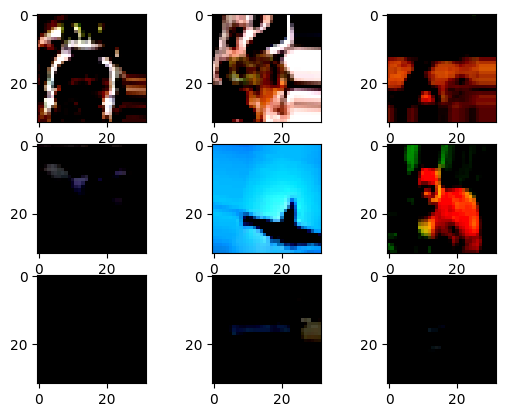

In [14]:
# Try more extensive data-augmentations (more geometric data-augmentations: affine transformations, scaling and 
# rotation and/or photo-metric augmentations.) and see if this gives a performance boost.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,  # randomly rotate images in the range (0-20 degrees)
    zoom_range=0.15,  # Randomly zoom image 
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images horizontally
    brightness_range=[0.2,1.0]  # change brightness of images
    )

# fit parameters from data
datagen.fit(trainX)

# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(trainX, trainY, batch_size=9):
    # create a grid of 3x3 images
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32, 3), cmap=plt.get_cmap('gray'))
    # show the plot
    plt.show()
    break


In [15]:
model.fit(
    datagen.flow(trainX, trainY, batch_size=BATCH_SIZE),
    epochs=EPOCHS,
    callbacks=[TqdmCallback(verbose=1)],
    validation_data=(testX, testY),
    shuffle=True,
    verbose=0
)


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2023-05-18 17:29:24.867836: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_8/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


In [69]:
from tensorflow.keras.layers import Input, Add, GlobalAveragePooling2D, Dense, Conv2D, Activation
from tensorflow.keras.models import Model



def define_resnet_like_model():
    inputs = Input(shape=(32, 32, 3))

    # Initial conv block
    x = Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform')(inputs)
    x = LayerNormalization()(x)
    x = Activation('relu')(x)

    # First residual block
    skip = x
    x = Conv2D(32, (3, 3), padding='same', strides=(2, 2), activation='relu', kernel_initializer='he_uniform')(x)
    x = LayerNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(32, (3, 3), padding='same', kernel_initializer='he_uniform')(x)
    skip = Conv2D(32, (1, 1), padding='same', strides=(2, 2))(skip)
    x = Add()([x, skip])  # Skip connection
    x = Activation('relu')(x)

    # Additional residual blocks should go here...

    # Global average pooling and output
    x = GlobalAveragePooling2D()(x)
    outputs = Dense(10, activation='softmax')(x)

    model = Model(inputs, outputs)

    opt = keras.optimizers.Adam()
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model


In [70]:
def run_test_harness_resnet():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # define model
    model = define_resnet_like_model()
    # fit model
    model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=0)
    # save model
    model.save('model_resnet.h5')

# entry point, run the test harness
#run_test_harness_4BD()

# evaluate the deep model on the test dataset

def run_test_harness_load_resnet():
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels_2(trainX, testX)
    # load model
    model = load_model('model_resnet.h5')
    # evaluate model on test dataset
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))

In [71]:
run_test_harness_resnet()



In [73]:
run_test_harness_load_resnet()

> 71.140
